<a href="https://colab.research.google.com/github/MDBhati/Predicting-Credit-Card-Approvals/blob/main/ML_mid_course_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Predicting Credit Card Approvals**

##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

Commercial banks receive many requests from people who want to get a credit card. However, not everyone who applies for a credit card gets approved. Many applications are turned down for various reasons, like having too much debt, low income, or too many recent requests for credit.

To decide who should get a credit card, banks used to rely on people to manually review each application. This process is not only boring but also prone to mistakes, and it takes a lot of time (and time is valuable!). Fortunately, we can use the power of machine learning to make this process faster and more accurate, just like real banks do.

In this project, I'll create a tool that can automatically predict whether someone should be approved for a credit card or not, using machine learning techniques. It's like having a smart computer that can help banks make these decisions quickly and efficiently.

**Dataset**

I used the [Credit Card Approval](http://archive.ics.uci.edu/dataset/27/credit+approval) dataset from the UCI Machine Learning Repository.

This is the Credit Card Approval Dataset which is a collection of credit card applications and the credit approval decisions,so All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.

But [this blog](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html) gives me a pretty good overview of the probable features.

In [ ]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

credit_card_app =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Project/Mid Course Assessment/crx.data",header=None)


In [ ]:
credit_card_app.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


 The probable features in a typical credit card application are **Gender**, **Age**, **Debt**, **Married**, **BankCustomer**, **EducationLevel**, **Ethnicity**, **YearsEmployed**, **PriorDefault**, **Employed**, **CreditScore**, **DriversLicense**, **Citizen**, **ZipCode**, **Income** and finally the **ApprovalStatus**.

In [ ]:
column_names = ["Gender", "Age", "Debt", "Married",
                "BankCustomer", "EducationLevel", "Ethnicity",
                "YearsEmployed", "PriorDefault", "Employed",
                "CreditScore", "DriversLicense", "Citizen",
                "ZipCode", "Income" , "ApprovalStatus"]

In [ ]:
# Change the coulmn names with their approximate names
credit_card_app.columns = column_names

In [ ]:
credit_card_app.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
variables  = pd.DataFrame(columns= ["variable","Number of unique varibale","values","Datatype"])
for i,var in enumerate(credit_card_app.columns):
  variables.loc[i] = [var,credit_card_app[var].nunique(),credit_card_app[var].unique().tolist(),credit_card_app[var].dtypes]
variables.set_index('variable')

,Number of unique varibale,values,Datatype
variable,,,
Gender,3,"[b, a, ?]",object
Age,350,"[30.83, 58.67, 24.50, 27.83, 20.17, 32.08, 33....",object
Debt,215,"[0.0, 4.46, 0.5, 1.54, 5.625, 4.0, 1.04, 11.58...",float64
Married,4,"[u, y, ?, l]",object
BankCustomer,4,"[g, p, ?, gg]",object
EducationLevel,15,"[w, q, m, r, cc, k, c, d, x, i, e, aa, ff, j, ?]",object
Ethnicity,10,"[v, h, bb, ff, j, z, ?, o, dd, n]",object
YearsEmployed,132,"[1.25, 3.04, 1.5, 3.75, 1.71, 2.5, 6.5, 0.04, ...",float64
PriorDefault,2,"[t, f]",object


There are some missing values in the dataset, In Gender,Age, Married, BankCustomer, EducationLevel, Ethnicity,ZipCode coulmns have some missing values.

### **Splitting the dataset into train and test sets**

 features like **DriversLicense** and **ZipCode** are not as important as the other features in the dataset for predicting credit card approvals.

In [ ]:
credit_card_app = credit_card_app.drop(["DriversLicense","ZipCode"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
# Split into train and test sets
credit_train,credit_test = train_test_split(credit_card_app, test_size=0.33, random_state=42)

## **Handling missing values**

In [ ]:
# Replace the '?'s with NaN in the train and test sets
credit_train = credit_train.replace("?",np.NaN)
credit_test = credit_test.replace("?",np.NaN)
credit_train.Age = credit_train.Age.replace('b',np.NaN)
credit_test.Age = credit_test.Age.replace('b',np.NaN)

In [ ]:
credit_train['Age']  = credit_train['Age'].astype('float')
credit_test['Age']  = credit_test['Age'].astype('float')

In [ ]:
# Impute the missing values with mean imputation
credit_train.fillna(credit_train.mean(), inplace=True)
credit_test.fillna(credit_test.mean(), inplace=True)


In [ ]:
# Iterate over each column of credit_train
for col in credit_train.columns:
    # Check if the column is of object type
    if credit_train[col].dtype == 'object':
        # Impute with the most frequent value
        credit_train = credit_train.fillna(credit_train[col].value_counts().index[0])
        credit_test = credit_test.fillna(credit_test[col].value_counts().index[0])

### EDA

In [ ]:
clean_credit_app  = pd.concat([credit_train,credit_test])
clean_credit_app.reset_index(drop=True,inplace=True)

In [ ]:
clean_credit_app.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,ApprovalStatus
0,a,24.33,2.500,y,p,i,bb,4.50,f,f,0,g,456,-
1,b,33.58,2.750,u,g,m,v,4.25,t,t,6,g,0,+
2,b,32.25,1.500,u,g,c,v,0.25,f,f,0,g,122,-
3,b,30.17,1.085,y,p,c,v,0.04,f,f,0,g,179,-
4,a,36.75,5.125,u,g,e,v,5.00,t,f,0,g,4000,+


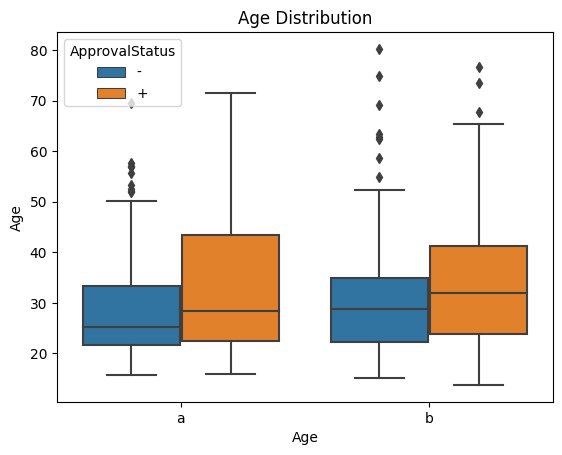

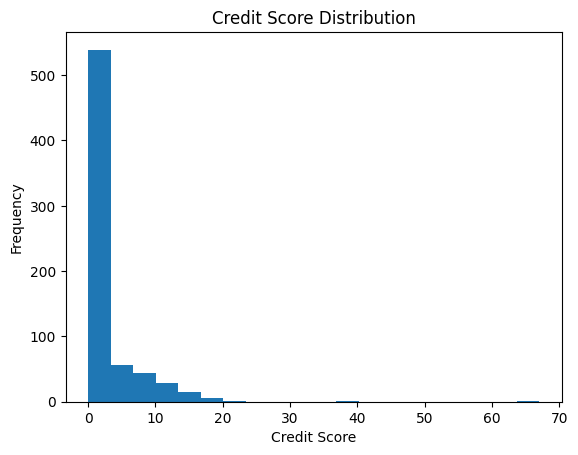

In [ ]:
import matplotlib.pyplot as plt
sns.boxplot(data = clean_credit_app,x='Gender',y='Age',hue='ApprovalStatus')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

clean_credit_app['CreditScore'].plot(kind='hist', bins=20)
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.show()

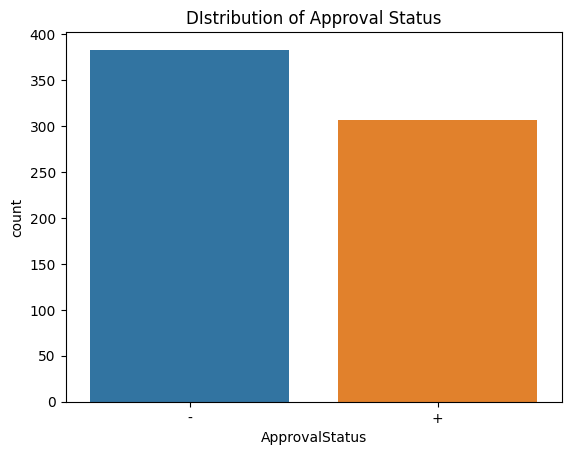

In [ ]:
sns.countplot(data= clean_credit_app,x='ApprovalStatus')
plt.title('DIstribution of Approval Status')
plt.show()

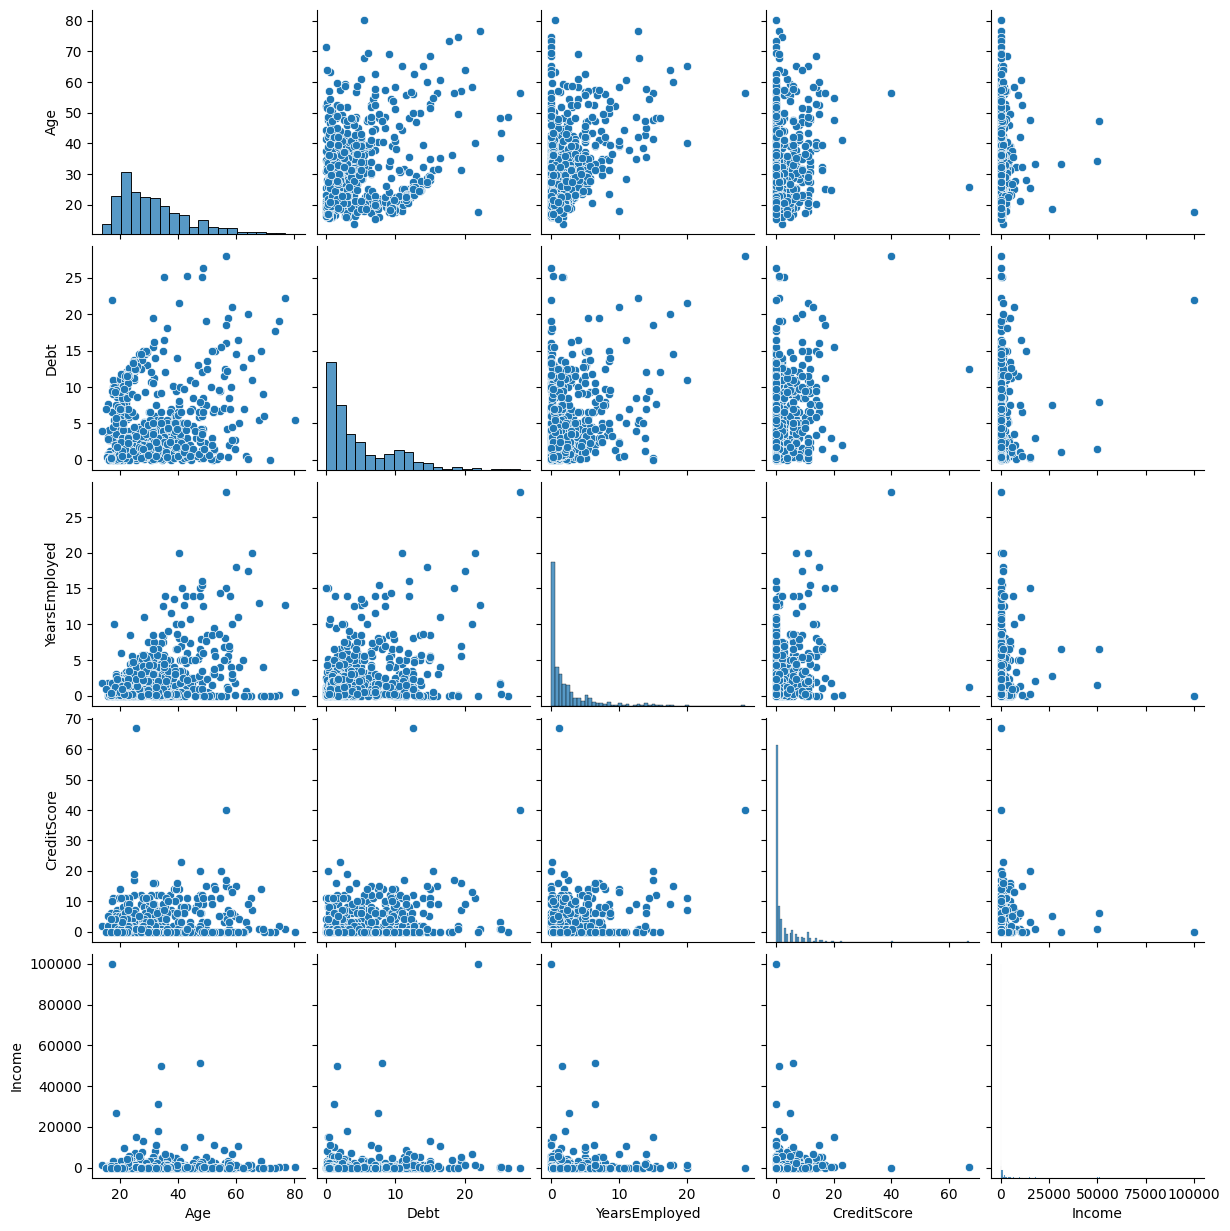

In [ ]:
import seaborn as sns
sns.pairplot(clean_credit_app)
plt.show()

<Axes: >

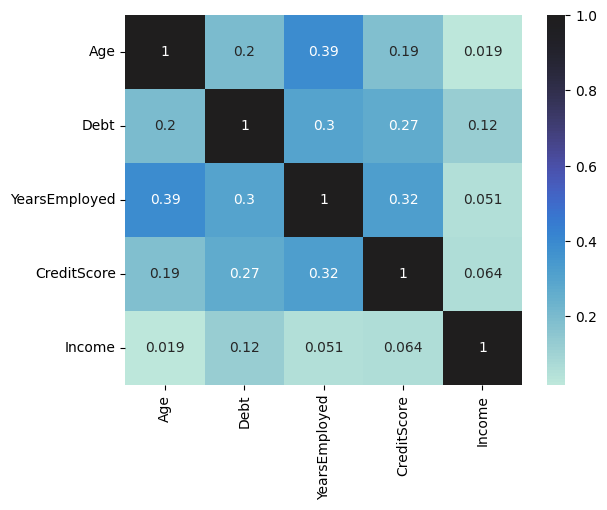

In [ ]:
sns.heatmap(clean_credit_app.corr(),annot=True,center=1)

- For Credit Card approval there are some most important features are considered as **YearsEmployed**,**credit score**,**Income**,priordefault in real banking system.
- In Box plot of age distribution we easily see that there is no evidence that age limitation is a factor to reject the approval.

### **Preprocessing the data**

In [ ]:
# Convert the categorical features in the train and test sets independently
credit_train = pd.get_dummies(credit_train)
credit_test = pd.get_dummies(credit_test)

# Reindex the columns of the test set aligning with the train set
credit_test = credit_test.reindex(columns=credit_train.columns, fill_value=0)

In [ ]:
print(credit_train.shape,credit_test.shape)

(462, 49) (228, 49)


In [ ]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Segregate features and labels into separate variables
X_train, y_train = credit_train.iloc[:, :-1].values, credit_train.iloc[:, [-1]].values
X_test, y_test = credit_test.iloc[:, :-1].values, credit_test.iloc[:, [-1]].values

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

## **Apply ML model**

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

LogisticRegression()

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier:  1.0
[[103   0]
 [  0 125]]


### **Grid searching and making the model perform better**

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001 , 0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol = tol,max_iter = max_iter)

In [ ]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: ", best_model.score(rescaledX_test,y_test))

Best: 1.000000 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  1.0


### **Applying Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Model Accuracy:", accuracy_dt)


Decision Tree Model Accuracy: 1.0
